In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import shutil
import time
import matplotlib.pyplot as plt
from keras.applications import vgg16
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import InputLayer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
data_set_path = '/home/vishwajeet/Documents/Summer_Project_FER/FER_Research/CK+_With_person_subfolder'
valid_path = '/home/vishwajeet/Documents/Summer_Project_FER/FER_Research/valid'
train_path = '/home/vishwajeet/Documents/Summer_Project_FER/FER_Research/train'
test_path = '/home/vishwajeet/Documents/Summer_Project_FER/FER_Research/test'

In [3]:
def cnn_model(class_sz):
    vgg = vgg16.VGG16(include_top=True, weights='imagenet')

    out = Dense(class_sz, activation='softmax', name='predictions')(vgg.layers[-2].output)
    vgg_model = Model(vgg.input, out)

    for layer in vgg_model.layers:
        if layer.name in ['predictions','fc1','fc2']:
            layer.trainable = True
        else:
            layer.trainable = False

    model = Sequential()
    model.add(vgg_model)
    
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 
    
    return model

In [4]:
def train_preprocess_img(img):
    data=[]
    img=img*255
    data.append(img)
    return(data)
def test_preprocess_img(img):
    data=[]
    img=img*255
    data.append(img)
    return(data)

In [5]:
train_batch_size=32
valid_batch_size=32
test_batch_size=1
sz=(224,224)
img_type= 'rgb'
if img_type == 'grayscale':
    inp_shape=(sz[0],sz[1],1)
elif img_type == 'rgb':
    inp_shape=(sz[0],sz[1],3)
elif img_type == 'rgba':
    inp_shape=(sz[0],sz[1],4)
EPOCH=25
epochs_to_wait_for_improve=10

========================================   Fold 1   ==============================================
Found 729 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Epoch 1/25
22/22 [==============================] - 243s 11s/step - loss: 8.1276 - accuracy: 0.3515 - val_loss: 3.3675 - val_accuracy: 0.4375

Epoch 00001: val_loss improved from inf to 3.36748, saving model to Best_model_for_epoch_1.h5
Epoch 2/25
22/22 [==============================] - 343s 16s/step - loss: 1.0151 - accuracy: 0.7374 - val_loss: 1.4932 - val_accuracy: 0.6866

Epoch 00002: val_loss improved from 3.36748 to 1.49318, saving model to Best_model_for_epoch_1.h5
Epoch 3/25
22/22 [==============================] - 386s 18s/step - loss: 0.1348 - accuracy: 0.9412 - val_loss: 0.7296 - val_accuracy: 0.8507

Epoch 00003: val_loss improved from 1.49318 to 0.72963, saving model to Best_model_for_epoch_1.h5
Epoch 4/25
22/22 [==============================] - 435s 20s/

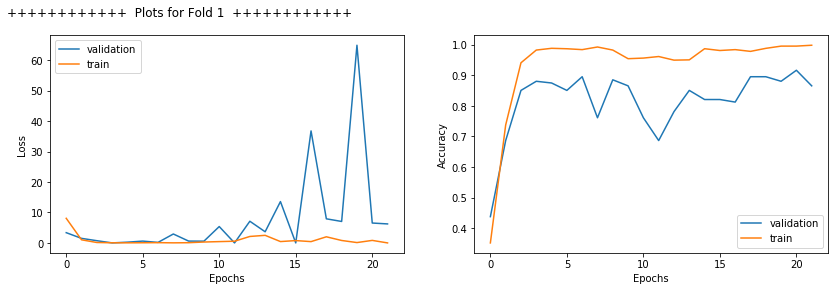

99/99 [==============================] - 32s 320ms/step
Confusion Matrix
[[ 6  0  0  3  4  2]
 [ 0 15  0  0  3  0]
 [ 0  0  1  0  5  3]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  5  4]
 [ 0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       1.00      0.83      0.91        18
           2       1.00      0.11      0.20         9
           3       0.88      1.00      0.93        21
           4       0.29      0.56      0.38         9
           5       0.75      1.00      0.86        27

    accuracy                           0.76        99
   macro avg       0.82      0.65      0.64        99
weighted avg       0.84      0.76      0.74        99

========================================   Fold 2   ==============================================
Found 729 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Epoch 1/25
22/22 [===================

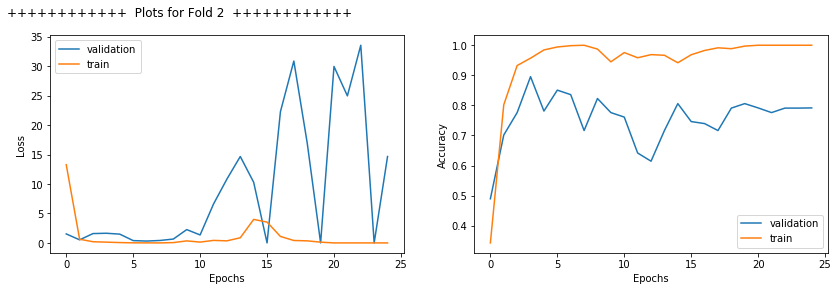

99/99 [==============================] - 32s 324ms/step
Confusion Matrix
[[10  4  0  0  1  0]
 [ 2 16  0  0  0  0]
 [ 0  0  8  1  0  0]
 [ 0  4  0 17  0  0]
 [ 0  6  1  0  2  0]
 [ 0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.53      0.89      0.67        18
           2       0.89      0.89      0.89         9
           3       0.94      0.81      0.87        21
           4       0.67      0.22      0.33         9
           5       1.00      1.00      1.00        27

    accuracy                           0.81        99
   macro avg       0.81      0.75      0.75        99
weighted avg       0.84      0.81      0.80        99

========================================   Fold 3   ==============================================
Found 732 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Epoch 1/25
22/22 [===================

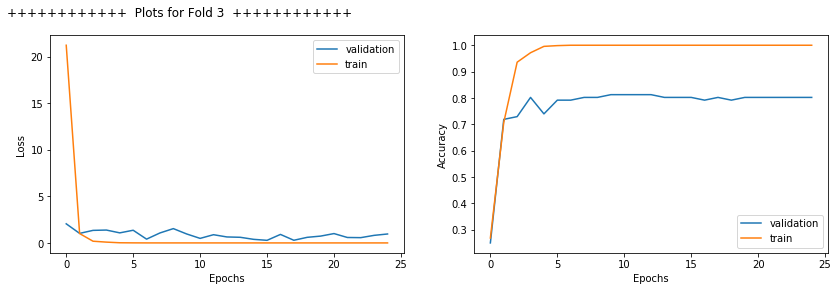

99/99 [==============================] - 34s 342ms/step
Confusion Matrix
[[10  3  0  0  0  2]
 [ 2 16  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 1  0  0 20  0  0]
 [ 4  0  0  2  3  0]
 [ 0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.84      0.89      0.86        18
           2       1.00      1.00      1.00         9
           3       0.91      0.95      0.93        21
           4       1.00      0.33      0.50         9
           5       0.93      1.00      0.96        27

    accuracy                           0.86        99
   macro avg       0.88      0.81      0.81        99
weighted avg       0.87      0.86      0.85        99

========================================   Fold 4   ==============================================
Found 735 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Epoch 1/25
22/22 [===================

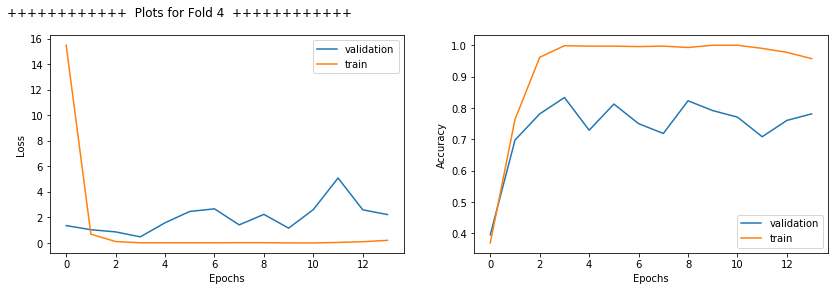

96/96 [==============================] - 32s 339ms/step
Confusion Matrix
[[ 9  6  0  0  0  0]
 [ 3 15  0  0  0  0]
 [ 0  0  4  0  3  2]
 [ 0  0  0 21  0  0]
 [ 5  0  2  0  2  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        15
           1       0.71      0.83      0.77        18
           2       0.67      0.44      0.53         9
           3       1.00      1.00      1.00        21
           4       0.40      0.22      0.29         9
           5       0.92      1.00      0.96        24

    accuracy                           0.78        96
   macro avg       0.71      0.68      0.69        96
weighted avg       0.77      0.78      0.77        96

========================================   Fold 5   ==============================================
Found 741 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Epoch 1/25
23/23 [===================

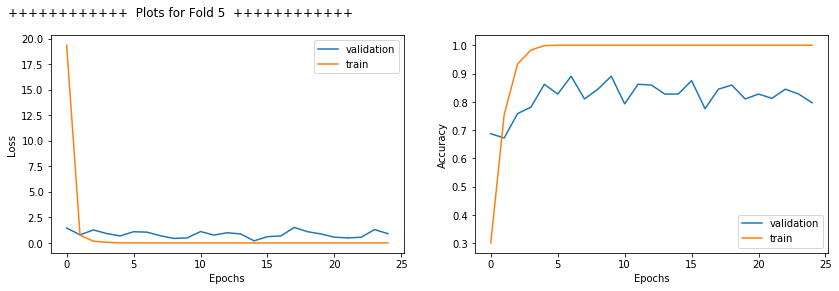

96/96 [==============================] - 33s 339ms/step
Confusion Matrix
[[ 9  3  0  0  3  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  2  0  0]
 [ 0  0  0 20  1  0]
 [ 9  0  0  0  0  0]
 [ 2  0  0  0  0 22]]
              precision    recall  f1-score   support

           0       0.45      0.60      0.51        15
           1       0.86      1.00      0.92        18
           2       1.00      0.78      0.88         9
           3       0.91      0.95      0.93        21
           4       0.00      0.00      0.00         9
           5       1.00      0.92      0.96        24

    accuracy                           0.79        96
   macro avg       0.70      0.71      0.70        96
weighted avg       0.77      0.79      0.78        96

========================================   Fold 6   ==============================================
Found 747 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/25


ResourceExhaustedError:  OOM when allocating tensor with shape[25088,4096] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[node Square_60 (defined at /home/vishwajeet/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_38504]

Function call stack:
keras_scratch_graph


In [6]:
cv=KFold(n_splits=10)
classes = os.listdir(data_set_path)
person_perclass = []
for c in classes:
    l=os.listdir(data_set_path+'/'+c)
    l=np.array(l)
    temp=[]
    for train_index, test_index in cv.split( X=l):
        temp.append(l[test_index])
    person_perclass.append(temp)
a=np.arange(0,10,1)
b=np.arange(0,10,1)
c=(b+1)%10
conf_foldwise = []
accuracy_foldwise = []
error_foldwise = []
actual_out = []
predict_out = []
training_time_per_epoch=[]
testing_time_per_epoch=[]
for i in range(10):
    print('===================================================================================================')
    print('========================================   Fold '+str(i+1)+'   ==============================================')
    print('===================================================================================================')
    model_name = 'Best_model_for_epoch_'+str(i+1)
    d=np.array([l for l in a if l not in [b[i], c[i]]])
    if not os.path.isdir(train_path):
        os.mkdir(train_path)
    else:
        shutil.rmtree(train_path)
        os.mkdir(train_path)

    if not os.path.isdir(test_path):
        os.mkdir(test_path)
    else:
        shutil.rmtree(test_path)
        os.mkdir(test_path)

    if not os.path.isdir(valid_path):
        os.mkdir(valid_path)
    else:
        shutil.rmtree(valid_path)
        os.mkdir(valid_path)
    for j in range(len(classes)):
        l = person_perclass[j][b[i]]
        if not os.path.isdir(test_path+'/'+classes[j]):
            os.mkdir(test_path+'/'+classes[j])
        for k in l:
            filelist = []
            [filelist.append(file) for file in os.listdir(data_set_path+'/'+classes[j]+'/'+k) if file.endswith('.png')]
            for f in filelist:
                img=plt.imread(data_set_path+'/'+classes[j]+'/'+k+'/'+f)
                data  = test_preprocess_img(img)
                for ix in range(len(data)):
                    cv2.imwrite(test_path+'/'+classes[j]+'/im_'+str(ix)+'_'+f,data[ix])
    for j in range(len(classes)):
        l = person_perclass[j][c[i]]
        if not os.path.isdir(valid_path+'/'+classes[j]):
            os.mkdir(valid_path+'/'+classes[j])
        for k in l:
            filelist = []
            [filelist.append(file) for file in os.listdir(data_set_path+'/'+classes[j]+'/'+k) if file.endswith('.png')]
            for f in filelist:
                img=plt.imread(data_set_path+'/'+classes[j]+'/'+k+'/'+f)
                data  = test_preprocess_img(img)
                for ix in range(len(data)):
                    cv2.imwrite(valid_path+'/'+classes[j]+'/im_'+str(ix)+'_'+f,data[ix])
    for j in range(len(classes)):
        for jj in range(d.shape[0]):
            l = person_perclass[j][d[jj]]
            if not os.path.isdir(train_path+'/'+classes[j]):
                os.mkdir(train_path+'/'+classes[j])
            for k in l:
                filelist = []
                [filelist.append(file) for file in os.listdir(data_set_path+'/'+classes[j]+'/'+k) if file.endswith('.png')]
                for f in filelist:
                    img=plt.imread(data_set_path+'/'+classes[j]+'/'+k+'/'+f)
                    data  = train_preprocess_img(img)
                    for ix in range(len(data)):
                        cv2.imwrite(train_path+'/'+classes[j]+'/im_'+str(ix)+'_'+f,data[ix])
    datagen = ImageDataGenerator()
    train_generator = datagen.flow_from_directory(train_path, class_mode='categorical', batch_size=train_batch_size, target_size=sz,color_mode=img_type, shuffle=True)
    valid_generator = datagen.flow_from_directory(valid_path, class_mode='categorical', batch_size=valid_batch_size, target_size=sz,color_mode=img_type, shuffle=True)
    test_generator = datagen.flow_from_directory(test_path, class_mode='categorical', batch_size=test_batch_size, target_size=sz, color_mode=img_type,  shuffle=False)
    
    class_size=len(np.unique(train_generator.classes))
    model = cnn_model(class_size)

    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
    
    
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=epochs_to_wait_for_improve)
    checkpoint_callback = ModelCheckpoint(model_name+'.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    start_time = time.time()
    history=model.fit_generator(generator=train_generator,
                        steps_per_epoch=STEP_SIZE_TRAIN,
                        validation_data=valid_generator,
                        validation_steps=STEP_SIZE_VALID,
                        epochs=EPOCH, callbacks=[early_stopping_callback, checkpoint_callback]
    )
    end_time = time.time()
    training_time_per_epoch.append(end_time-start_time)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('++++++++++++  Plots for Fold '+str(i+1) +'  ++++++++++++')
    plt.subplots_adjust(left=0.2, bottom=None, right=2, top=None, wspace=None, hspace=None)
    ax1.plot(history.history['val_loss'])
    ax1.plot(history.history['loss'])
    ax1.legend(['validation','train'])
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax2.plot(history.history['val_accuracy'])
    ax2.plot(history.history['accuracy'])
    ax2.legend(['validation','train'])
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    plt.show()
    saved_model = load_model(model_name+'.h5')
    STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
    test_generator.reset()
    start_time = time.time()
    pred=model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)
    end_time = time.time()
    testing_time_per_epoch.append(end_time-start_time)
    accuracy_foldwise.append(pred[1])
    error_foldwise.append(pred[0])
    test_generator.reset()
    pred=model.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)
    pred_l = np.argmax(pred, axis=1)
    print('Confusion Matrix')
    conf = confusion_matrix(test_generator.classes, pred_l)
    print(conf)
    print(classification_report(test_generator.classes, pred_l))
    conf_foldwise.append(conf)
    actual_out.append(test_generator.classes)
    predict_out.append(pred)
